# Computational Theory Assignment

## a)

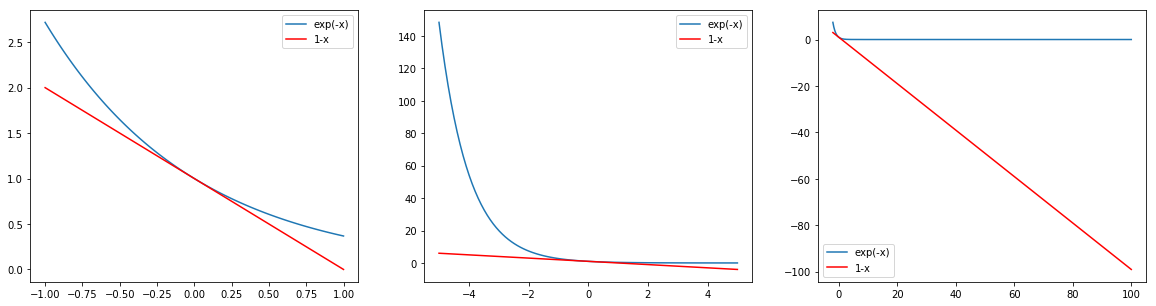

In [3]:
import numpy as np
from matplotlib import pyplot as plt

f, ax = plt.subplots(1,3) 
f.set_figheight(5)
f.set_figwidth(20)

x = np.linspace(-1, 1, 100)
ax[0].plot(x, np.exp(-x), label='exp(-x)')
ax[0].plot(x,1-x, color = 'red', label = '1-x')
ax[0].legend(loc='best')

x = np.linspace(-5, 5, 100)
ax[1].plot(x, np.exp(-x), label='exp(-x)')
ax[1].plot(x,1-x, color = 'red', label = '1-x')
ax[1].legend(loc='best')

x = np.linspace(-2, 100, 1000)
ax[2].plot(x, np.exp(-x), label='exp(-x)')
ax[2].plot(x,1-x, color = 'red', label = '1-x')
ax[2].legend(loc='best')

## b)

In [33]:
data = np.append(dats_a, dats_b, axis=0)
labels = np.append(label_a, label_b)

m = 1000
for i in range(data.shape[1]):
    for j in range(data.shape[0]):
        pred = np.zeros((2, data.shape[0]))
        pred[0, data[:,i]<data[j,i]] = 1
        pred[1, data[:,i]>data[j,i]] = 1
        
        ii = np.argmin(np.sum(np.abs(pred-labels), axis=1))
        min_ii = np.amin(np.sum(np.abs(pred-labels), axis=1))
        if min_ii < m:
            print(min_ii)
            m = min_ii
            f_star = i
            theta_star = j
            y_star = ii
            pred_star = np.array(pred[y_star,:], copy=True)
print(f_star)
print(theta_star)
print(y_star)

876.0
328.0
327.0
323.0
322.0
0
738
1


In [7]:
def stump(data, labels):
    m = len(labels)
    for i in range(data.shape[1]):
        for j in range(data.shape[0]):
            pred = np.zeros((2, data.shape[0]))
            pred[0, data[:,i]<data[j,i]] = 1
            pred[1, data[:,i]>data[j,i]] = 1

            ii = np.argmin(np.sum(np.abs(pred-labels), axis=1))
            min_ii = np.amin(np.sum(np.abs(pred-labels), axis=1))
            if min_ii < m:
                m = min_ii
                f_star = i
                theta_star = j
                y_star = ii
                pred_star = np.array(pred[y_star,:], copy=True)
                
    return f_star, theta_star, y_star, pred_star, m

## c)

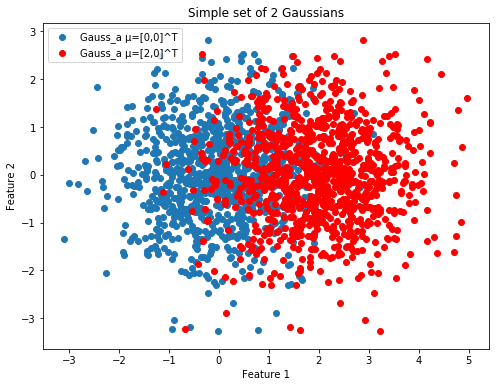

In [15]:
num_samples = 1000
dats_a = np.random.multivariate_normal([0,0], np.eye(2), num_samples)
label_a = np.zeros(num_samples)
dats_b = np.random.multivariate_normal([2,0], np.eye(2), num_samples)
label_b = np.ones_like(label_a)

plt.figure(figsize=(8, 6))
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Simple set of 2 Gaussians")
plt.scatter(dats_a[:,0], dats_a[:,1], label='Gauss_a μ=[0,0]^Τ')
plt.scatter(dats_b[:,0], dats_a[:,1], label='Gauss_a μ=[2,0]^Τ', color='r')
plt.legend(loc='best')

data = np.append(dats_a, dats_b, axis=0)
labels = np.append(label_a, label_b)

f_star: 0
theta_star: 914
y_star: 1


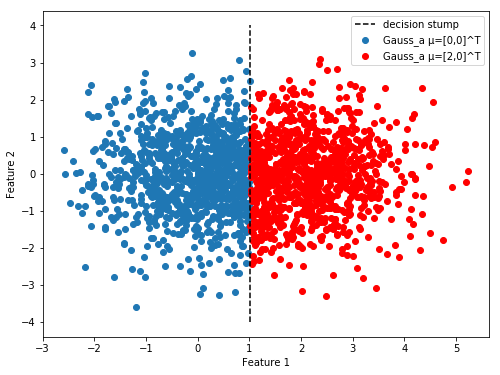

In [9]:
f_star, theta_star, y_star, pred_star, _ = stump(data, labels)
print("f_star:", f_star)
print("theta_star:", theta_star)
print("y_star:", y_star)

plt.figure(figsize=(8, 6))
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.scatter(data[pred_star==0,0], data[pred_star==0,1], label= 'Gauss_a μ=[0,0]^Τ')
plt.scatter(data[pred_star==1,0], data[pred_star==1,1], color='r', label= 'Gauss_a μ=[2,0]^Τ')
yy = np.linspace(-4,4,100)
plt.plot(data[theta_star, f_star]*np.ones(100), yy, 'k--', label='decision stump' )
plt.legend(loc='best')

f_star: 0
theta_star: 914
y_star: 1


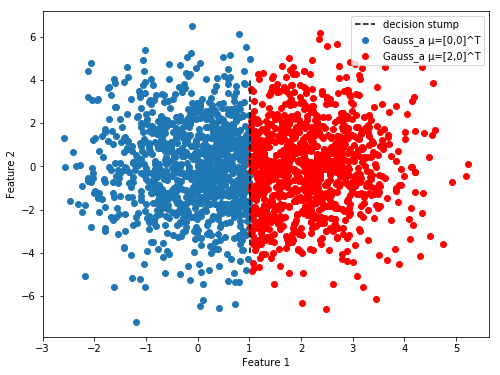

In [10]:
data[:,1] = data[:,1] * 2
#data[:,0] = data[:,0] * 3

f_star, theta_star, y_star, pred_star, _ = stump(data, labels)
print("f_star:", f_star)
print("theta_star:", theta_star)
print("y_star:", y_star)

plt.figure(figsize=(8, 6))
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.scatter(data[pred_star==0,0], data[pred_star==0,1], label= 'Gauss_a μ=[0,0]^Τ')
plt.scatter(data[pred_star==1,0], data[pred_star==1,1], color='r', label= 'Gauss_a μ=[2,0]^Τ')
yy = np.linspace(-4,4,100)
plt.plot(data[theta_star, f_star]*np.ones(100), yy, 'k--', label='decision stump' )
plt.legend(loc='best')

## d) 

In [11]:
import os 
import glob

fname = os.path.join(r'..', r'data', r'optdigitsubset.txt')
data = np.loadtxt(fname)
labels = np.append(np.zeros(554), np.ones(571))
print(data.shape, labels.shape)

train_data = np.array(data[0:50,:], copy=True)
train_data = np.append(train_data, data[1075:], 0)
test_data = np.array(data[50:1075,:], copy=True)
test_labels = np.array(labels[50:1075])
train_labels = np.zeros(100)
train_labels[50:] = 1
print(train_data.shape, train_labels.shape, test_data.shape, test_labels.shape)

(1125, 64) (1125,)
(100, 64) (100,) (1025, 64) (1025,)


In [12]:
f_star, theta_star, y_star, pred_star, m = stump(train_data, train_labels)
app_error = m/len(train_labels)
print("f_star:", f_star)
print("theta_star:", theta_star)
print("y_star:", y_star)
print("Apparent Error:", app_error)

pred = np.zeros_like(test_labels)
pred[test_data[:,f_star] > test_data[theta_star, f_star]] = 1
true_error = np.sum(np.abs(pred - test_labels))/len(test_labels)
print("True Error:", true_error)

f_star: 36
theta_star: 20
y_star: 1
Apparent Error: 0.02
True Error: 0.025365853658536587


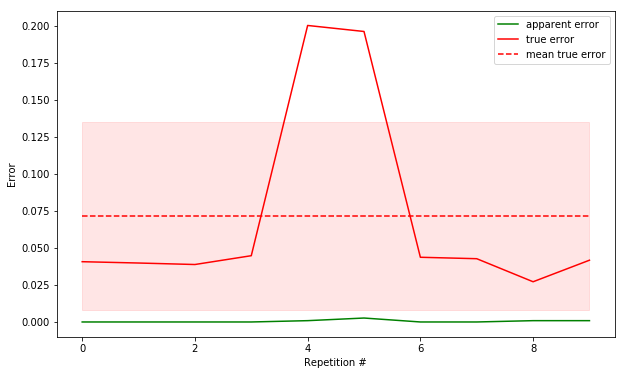

In [13]:
num_rep = 10
app_error = np.zeros(num_rep)
true_error = np.zeros_like(app_error)
for i in range(num_rep):
    ii = np.floor(np.random.rand(100)*len(labels)).astype(int)
    train_data = data[ii,:]
    train_labels = labels[ii]
    test_data = np.delete(data, ii, 0)
    test_labels = np.delete(labels, ii)
    
    f_star, theta_star, y_star, pred_star, m = stump(train_data, train_labels)
    app_error[i] = m/len(labels)
    pred = np.zeros(len(test_labels))
    if y_star == 0:
        pred[test_data[:,f_star] < test_data[theta_star, f_star]] = 1
    else:
        pred[test_data[:,f_star] > test_data[theta_star, f_star]] = 1
    true_error[i] = np.sum(np.abs(pred - test_labels))/len(test_labels)

mean_app_error = np.mean(app_error)
std_app_error = np.std(app_error)
mean_true_error = np.mean(true_error)
std_true_error = np.std(true_error)

aa = np.arange(num_rep)
plt.figure(figsize=(10,6))
plt.xlabel("Repetition #")
plt.ylabel("Error")
plt.plot(aa, app_error, color = 'g',label = 'apparent error')
plt.plot(aa, true_error, color = 'r', label = 'true error')
plt.plot(aa, mean_true_error*np.ones(num_rep), 'r--', label = "mean true error")
plt.fill_between(aa, mean_true_error*np.ones(num_rep) - std_true_error*np.ones(num_rep),
                    mean_true_error*np.ones(num_rep) + std_true_error*np.ones(num_rep), 
                 alpha=0.1, color="r")
plt.legend(loc='best')

## e)

In [1]:
def weighted_stump(data, labels, weights):
    m = len(labels)
    for i in range(data.shape[1]):
        for j in range(data.shape[0]):
            pred = np.zeros((2, data.shape[0]))
            pred[0, data[:,i]<data[j,i]] = 1
            pred[1, data[:,i]>data[j,i]] = 1

            ii = np.argmin(np.sum(weights * np.abs(pred-labels), axis=1))
            min_ii = np.amin(np.sum(weights * np.abs(pred-labels), axis=1))
            if min_ii < m:
                m = min_ii
                f_star = i
                theta_star = j
                y_star = ii
                pred_star = np.array(pred[y_star,:], copy=True)
                
    return f_star, theta_star, y_star, pred_star, m

In [28]:
# assign a bigger weight to the second Gaussian, so the stump moves to the left
num_samples = 1000
dats_a = np.random.multivariate_normal([0,0], np.eye(2), num_samples)
label_a = np.zeros(num_samples)
dats_b = np.random.multivariate_normal([2,0], np.eye(2), num_samples)
label_b = np.ones_like(label_a)
data = np.append(dats_a, dats_b, axis=0)
label = np.append(label_a, label_b)

weights = np.ones(data.shape[0])
weights[1000:] *= 100
weights /= np.sum(weights)

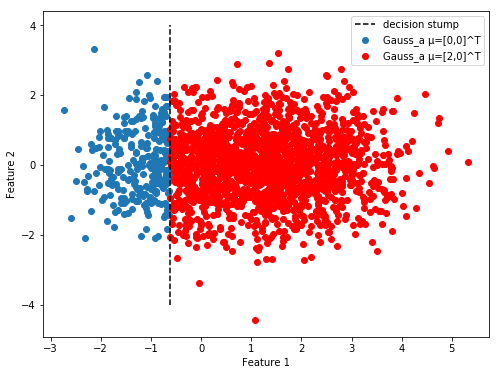

In [29]:
f_star, theta_star, y_star, pred_star, m = weighted_stump(data, labels, weights)

plt.figure(figsize=(8, 6))
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.scatter(data[pred_star==0,0], data[pred_star==0,1], label= 'Gauss_a μ=[0,0]^Τ')
plt.scatter(data[pred_star==1,0], data[pred_star==1,1], color='r', label= 'Gauss_a μ=[2,0]^Τ')
yy = np.linspace(-4,4,100)
plt.plot(data[theta_star, f_star]*np.ones(100), yy, 'k--', label='decision stump' )
plt.legend(loc='best')

## f)

In [40]:
# Adaboost
num_samples = 1000
dats_a = np.random.multivariate_normal([0,0], np.eye(2), num_samples)
label_a = np.ones(num_samples)
dats_b = np.random.multivariate_normal([2,0], np.eye(2), num_samples)
label_b = -np.ones_like(label_a)
data = np.append(dats_a, dats_b, axis=0)
label = np.append(label_a, label_b)

num_K = 10
f_k = np.empty((len(labels)))
a_k = []
for K in range(num_K):
    weights = np.ones(data.shape[0])
    f_star, theta_star, y_star, pred_star, e = weighted_stump(data, labels, weights)
    alpha = 0.5 * np.log(np.sum(weights)/e - 1)
    weights = np.exp(-labels * np.matmul(f_k, a_k))
    pred = weights * pred_star
    a_k.append(alpha)
    f_k = np.append(f_k, pred[:,np.newaxis], axis = 1)

ValueError: shapes (2000,) and (0,) not aligned: 2000 (dim 0) != 0 (dim 0)